In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [40]:
mrt_df = pd.read_csv('Data\Master Sets\TrainStationMaster.csv')

In [41]:
mrt_df.head()

,Unnamed: 0,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,0,2024-03,WEEKDAY,11,TRAIN,NS7,21943,15130
1,1,2024-03,WEEKENDS/HOLIDAY,11,TRAIN,NS7,13062,14512
2,2,2024-03,WEEKDAY,16,TRAIN,SW4,2124,3233
3,3,2024-03,WEEKENDS/HOLIDAY,16,TRAIN,SW4,1532,1736
4,4,2024-03,WEEKENDS/HOLIDAY,10,TRAIN,CC5,1886,2659


In [42]:
mrt_df.describe()

,Unnamed: 0,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,75975.000000,75975.000000,75975.000000,75975.000000
mean,14865.844923,11.467706,9850.116301,9838.690503
std,25024.451224,6.924114,18465.085892,18516.114064
min,0.000000,0.000000,0.000000,0.000000
25%,2110.000000,5.000000,386.000000,482.000000
50%,4220.000000,11.000000,3075.000000,3075.000000
75%,6331.000000,17.000000,10923.000000,10498.000000
max,75974.000000,23.000000,372959.000000,366060.000000


In [43]:
mrt_thomson_ec_df = mrt_df[mrt_df['PT_CODE'].str.contains('TE')].copy()
mrt_thomson_ec_df

,Unnamed: 0,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
12,12,2024-03,WEEKDAY,12,TRAIN,TE16,6611,4702
13,13,2024-03,WEEKENDS/HOLIDAY,12,TRAIN,TE16,4933,3732
22,22,2024-03,WEEKDAY,0,TRAIN,DT10/TE11,77,509
23,23,2024-03,WEEKENDS/HOLIDAY,0,TRAIN,DT10/TE11,40,312
24,24,2024-03,WEEKDAY,10,TRAIN,EW16/NE3/TE17,25477,36063
...,...,...,...,...,...,...,...,...
75966,75966,2024-11,WEEKENDS/HOLIDAY,4,TRAIN,TE29,0,0
75967,75967,2024-11,WEEKENDS/HOLIDAY,1,TRAIN,TE28,0,0
75968,75968,2024-11,WEEKENDS/HOLIDAY,2,TRAIN,TE28,0,0
75969,75969,2024-11,WEEKENDS/HOLIDAY,3,TRAIN,TE28,0,0


In [44]:
mrt_thomson_ec_df.describe()

,Unnamed: 0,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,10376.000000,10376.000000,10376.000000,10376.000000
mean,16320.527274,11.201619,7032.119699,7283.500096
std,26223.519351,6.997901,15786.546903,16977.749478
min,0.000000,0.000000,0.000000,0.000000
25%,2109.750000,5.000000,116.750000,228.750000
50%,4349.500000,11.000000,2226.500000,2389.500000
75%,6488.250000,17.000000,6315.500000,6089.500000
max,75970.000000,23.000000,172192.000000,222938.000000


In [45]:
mrt_thomson_ec_df['PT_CODE'].unique()

array(['TE16', 'DT10/TE11', 'EW16/NE3/TE17', 'NS27/CE2/TE20', 'TE15',
       'TE22', 'NS9/TE2', 'TE6', 'TE5', 'TE3', 'TE4', 'TE12', 'TE13',
       'TE8', 'CC17/TE9', 'TE19', 'TE18', 'TE1', 'TE14/NS22', 'TE7',
       'TE26', 'TE11', 'TE23', 'TE27', 'TE24', 'TE25', 'TE29', 'TE28'],
      dtype=object)

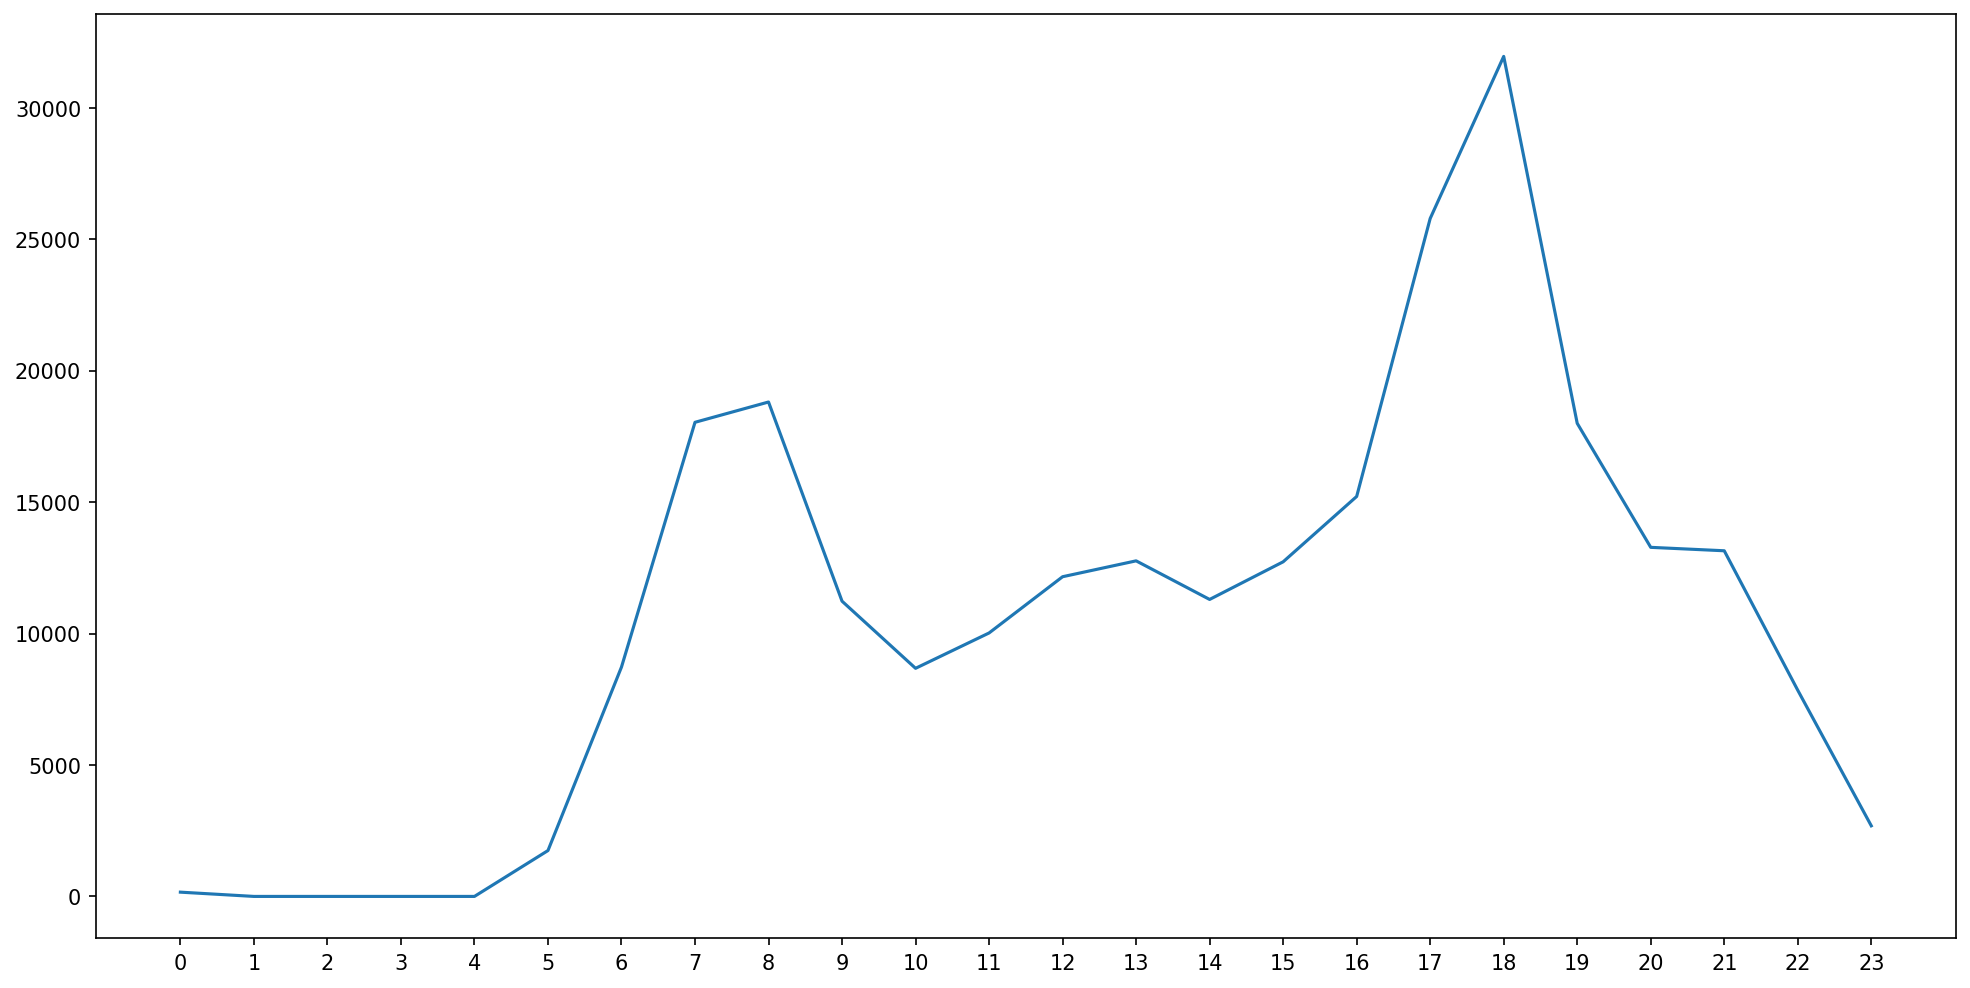

In [46]:
plt.figure(figsize=(16, 8), dpi=150) 

temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY'].copy()
temp_df = temp_df.groupby('TIME_PER_HOUR')['TOTAL_TAP_IN_VOLUME'].mean()

plt.plot(temp_df)

plt.xticks(np.arange(0, 24, 1.0))
plt.show()

# Peak periods at 7.30am and 6pm (going in and back from work) for weekdays

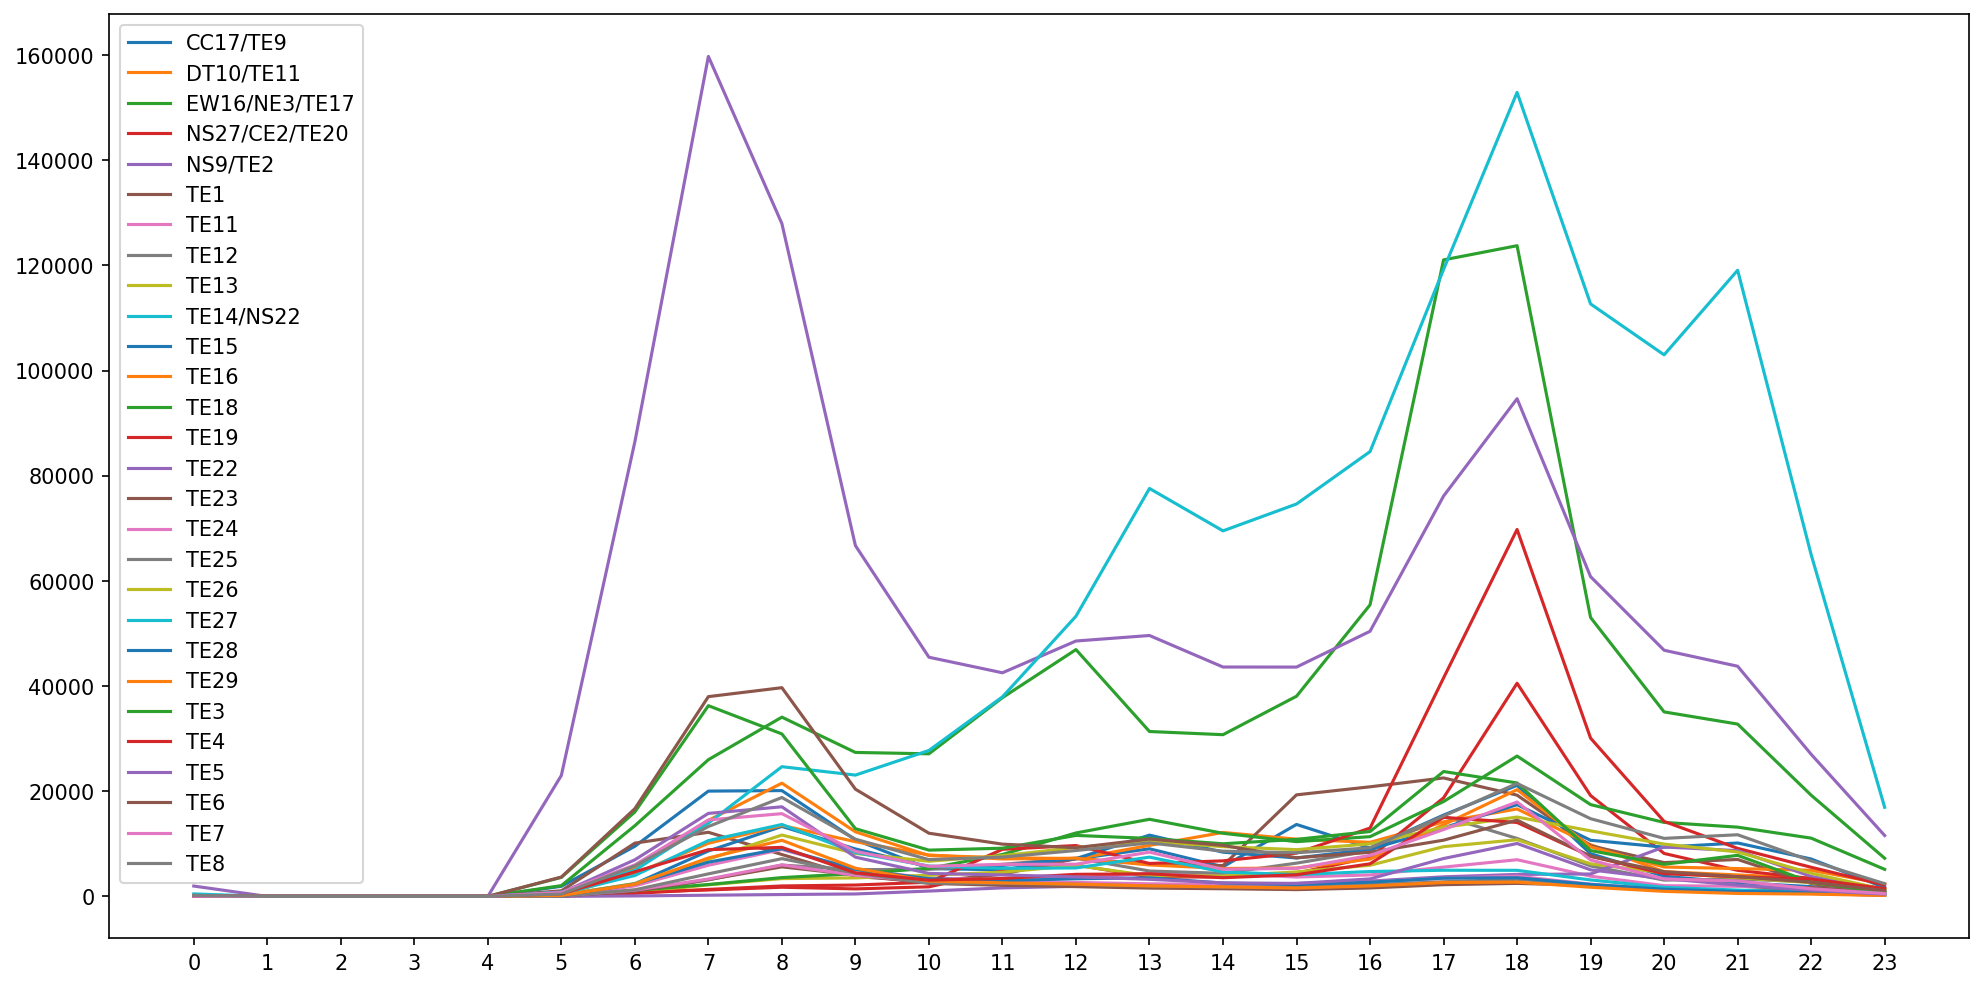

In [47]:
plt.figure(figsize=(16, 8), dpi=150) 

stations = mrt_thomson_ec_df['PT_CODE'].unique()
stations.sort()

for pt in stations:
    temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY'].copy()
    temp_df = temp_df[temp_df['PT_CODE'] == pt].copy().sort_values(by='TIME_PER_HOUR')
    temp_df = temp_df.groupby('TIME_PER_HOUR')['TOTAL_TAP_IN_VOLUME'].mean()

    plt.plot(temp_df, label = pt)

plt.legend()
plt.xticks(np.arange(0, 24, 1.0))
plt.show()

# Peak periods at 7.30am and 6pm (going in and back from work) for weekdays

In [48]:
mrt_thomson_ec_df[(mrt_thomson_ec_df['TIME_PER_HOUR'] >= 7) & (mrt_thomson_ec_df['TIME_PER_HOUR'] <= 7)]

,Unnamed: 0,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
468,468,2024-03,WEEKENDS/HOLIDAY,7,TRAIN,TE16,1675,1436
469,469,2024-03,WEEKDAY,7,TRAIN,TE16,8539,6678
738,738,2024-03,WEEKDAY,7,TRAIN,TE18,1971,6252
739,739,2024-03,WEEKENDS/HOLIDAY,7,TRAIN,TE18,504,1283
1582,1582,2024-03,WEEKENDS/HOLIDAY,7,TRAIN,TE15,865,1824
...,...,...,...,...,...,...,...,...
61727,6036,2024-11,WEEKENDS/HOLIDAY,7,TRAIN,TE24,569,735
61762,6071,2024-11,WEEKDAY,7,TRAIN,CC17/TE9,18852,17579
61952,6261,2024-11,WEEKENDS/HOLIDAY,7,TRAIN,TE18,659,1614
62015,6324,2024-11,WEEKENDS/HOLIDAY,7,TRAIN,TE29,894,364


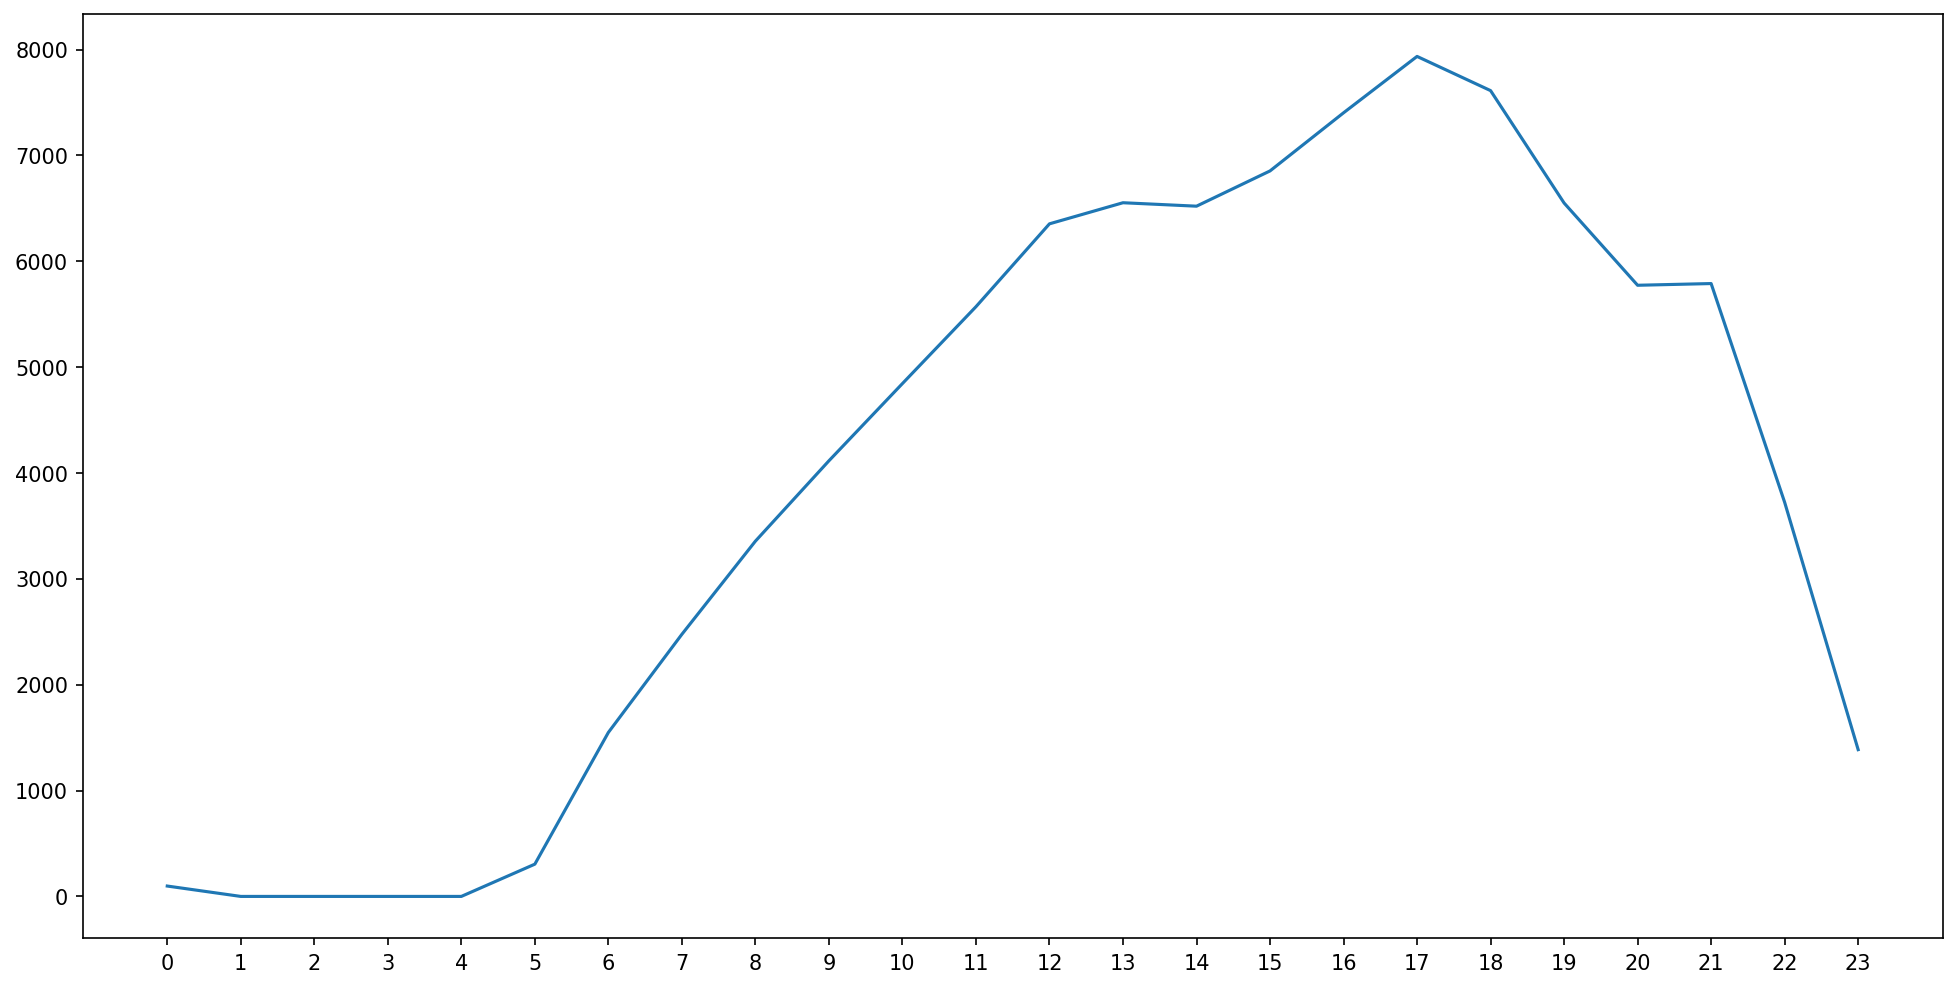

In [49]:
plt.figure(figsize=(16, 8), dpi=150) 

temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'].copy()
temp_df = temp_df.groupby('TIME_PER_HOUR')['TOTAL_TAP_IN_VOLUME'].mean()

plt.plot(temp_df)

plt.xticks(np.arange(0, 24, 1.0))
plt.show()

# Peak periods at 7.30am and 6pm (going in and back from work) for weekdays

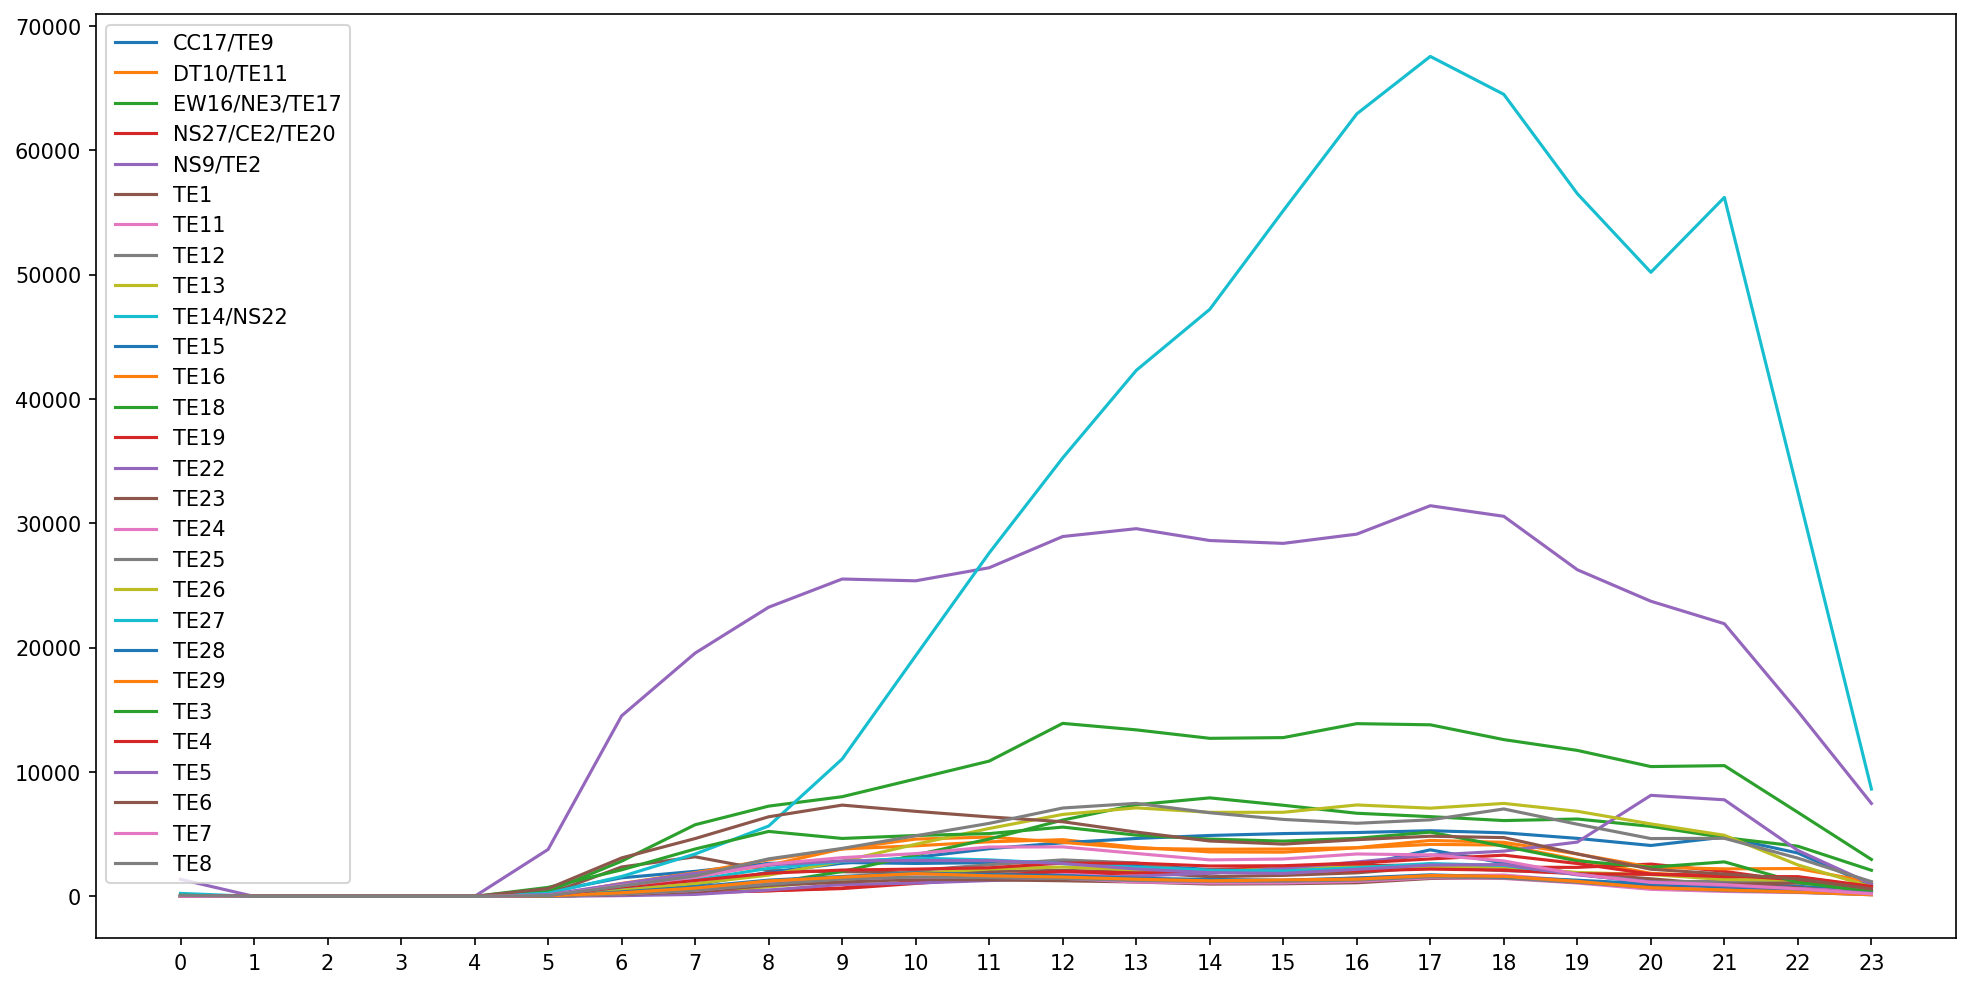

In [50]:
plt.figure(figsize=(16, 8), dpi=150) 

stations = mrt_thomson_ec_df['PT_CODE'].unique()
stations.sort()

for pt in stations:
    temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'].copy()
    temp_df = temp_df[temp_df['PT_CODE'] == pt].copy().sort_values(by='TIME_PER_HOUR')
    temp_df = temp_df.groupby('TIME_PER_HOUR')['TOTAL_TAP_IN_VOLUME'].mean()

    plt.plot(temp_df, label = pt)

plt.legend()
plt.xticks(np.arange(0, 24, 1.0))
plt.show()

# Much less volume overall
# Ramps up in the morning and stays for most of the day
# Peaks around 5pm

In [51]:
mrt_thomson_ec_df_numeric = mrt_thomson_ec_df[['TIME_PER_HOUR', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']]

In [52]:
mrt_thomson_ec_df_numeric.corr()

,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
TIME_PER_HOUR,1.000000,0.216128,0.165514
TOTAL_TAP_IN_VOLUME,0.216128,1.000000,0.715717
TOTAL_TAP_OUT_VOLUME,0.165514,0.715717,1.000000


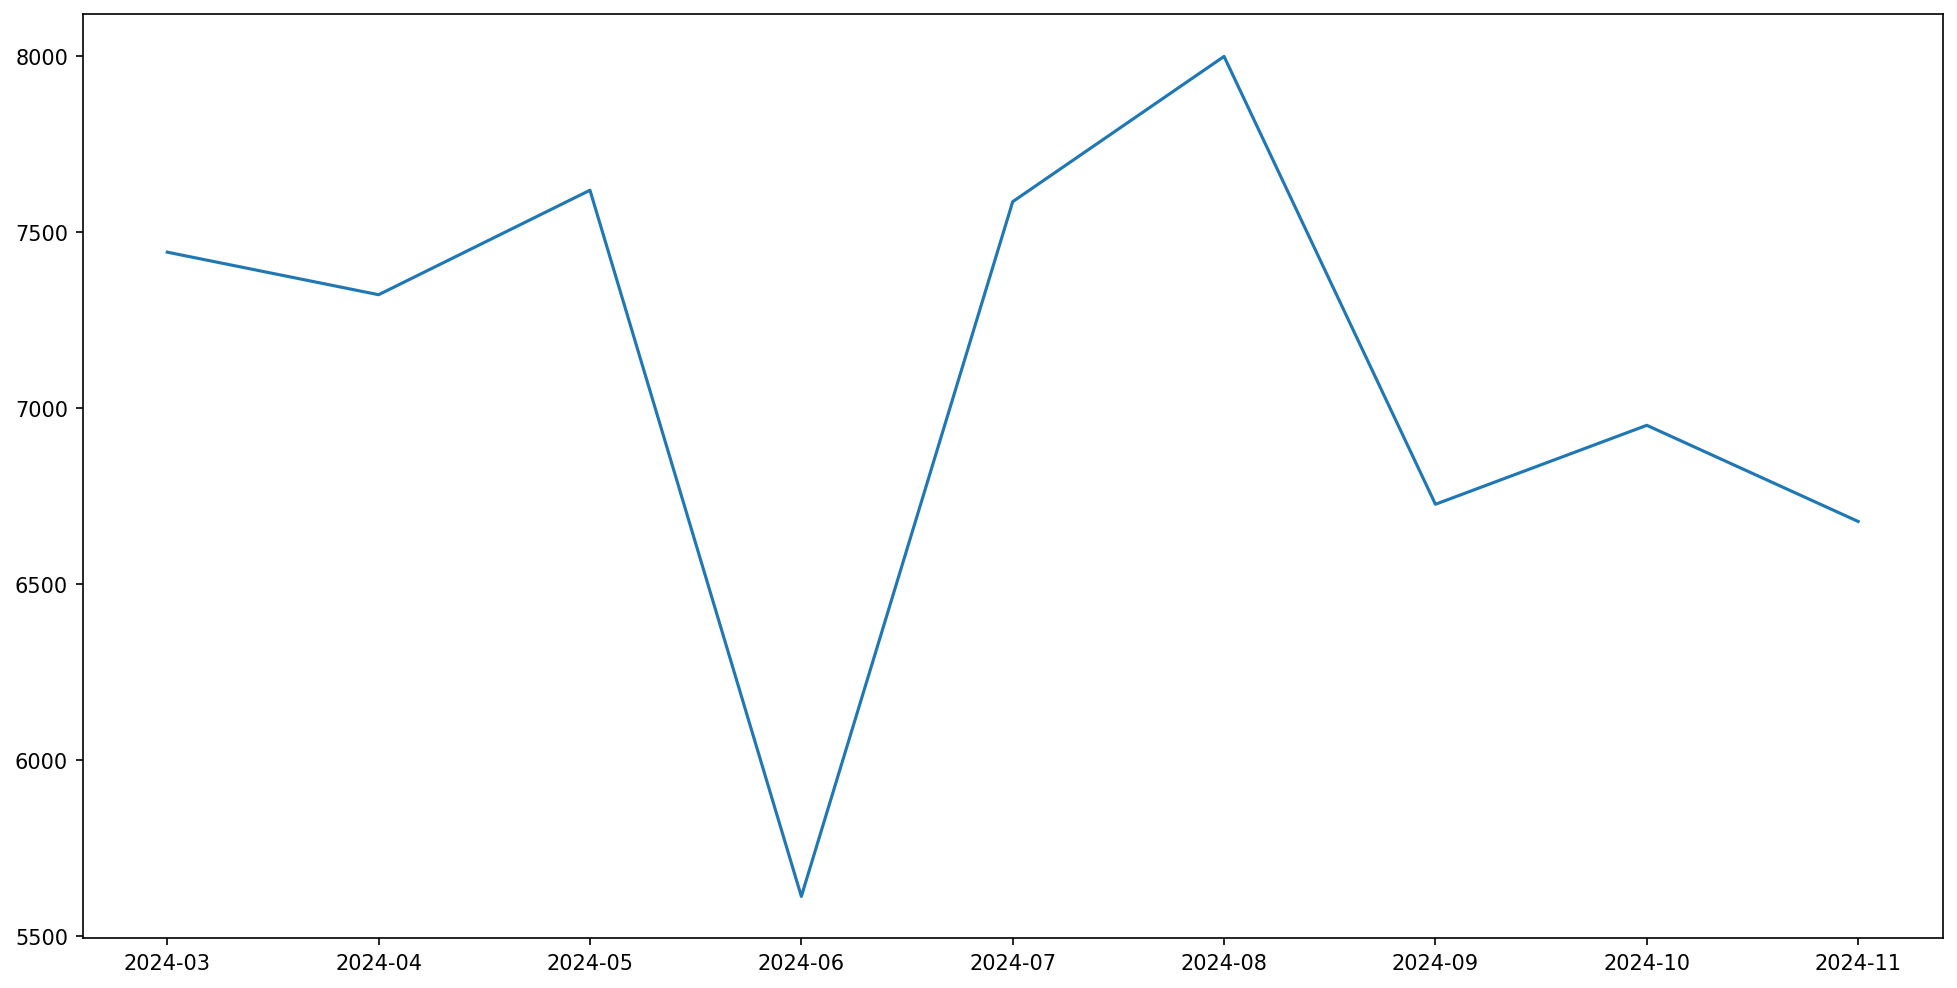

In [53]:
plt.figure(figsize=(16, 8), dpi=150) 

stations = mrt_thomson_ec_df['PT_CODE'].unique()
stations.sort()

temp_df = mrt_thomson_ec_df.groupby('YEAR_MONTH')['TOTAL_TAP_IN_VOLUME'].mean()

plt.plot(temp_df)
plt.xticks(np.arange(0, len(mrt_thomson_ec_df['YEAR_MONTH'].unique()), 1.0))
plt.show()

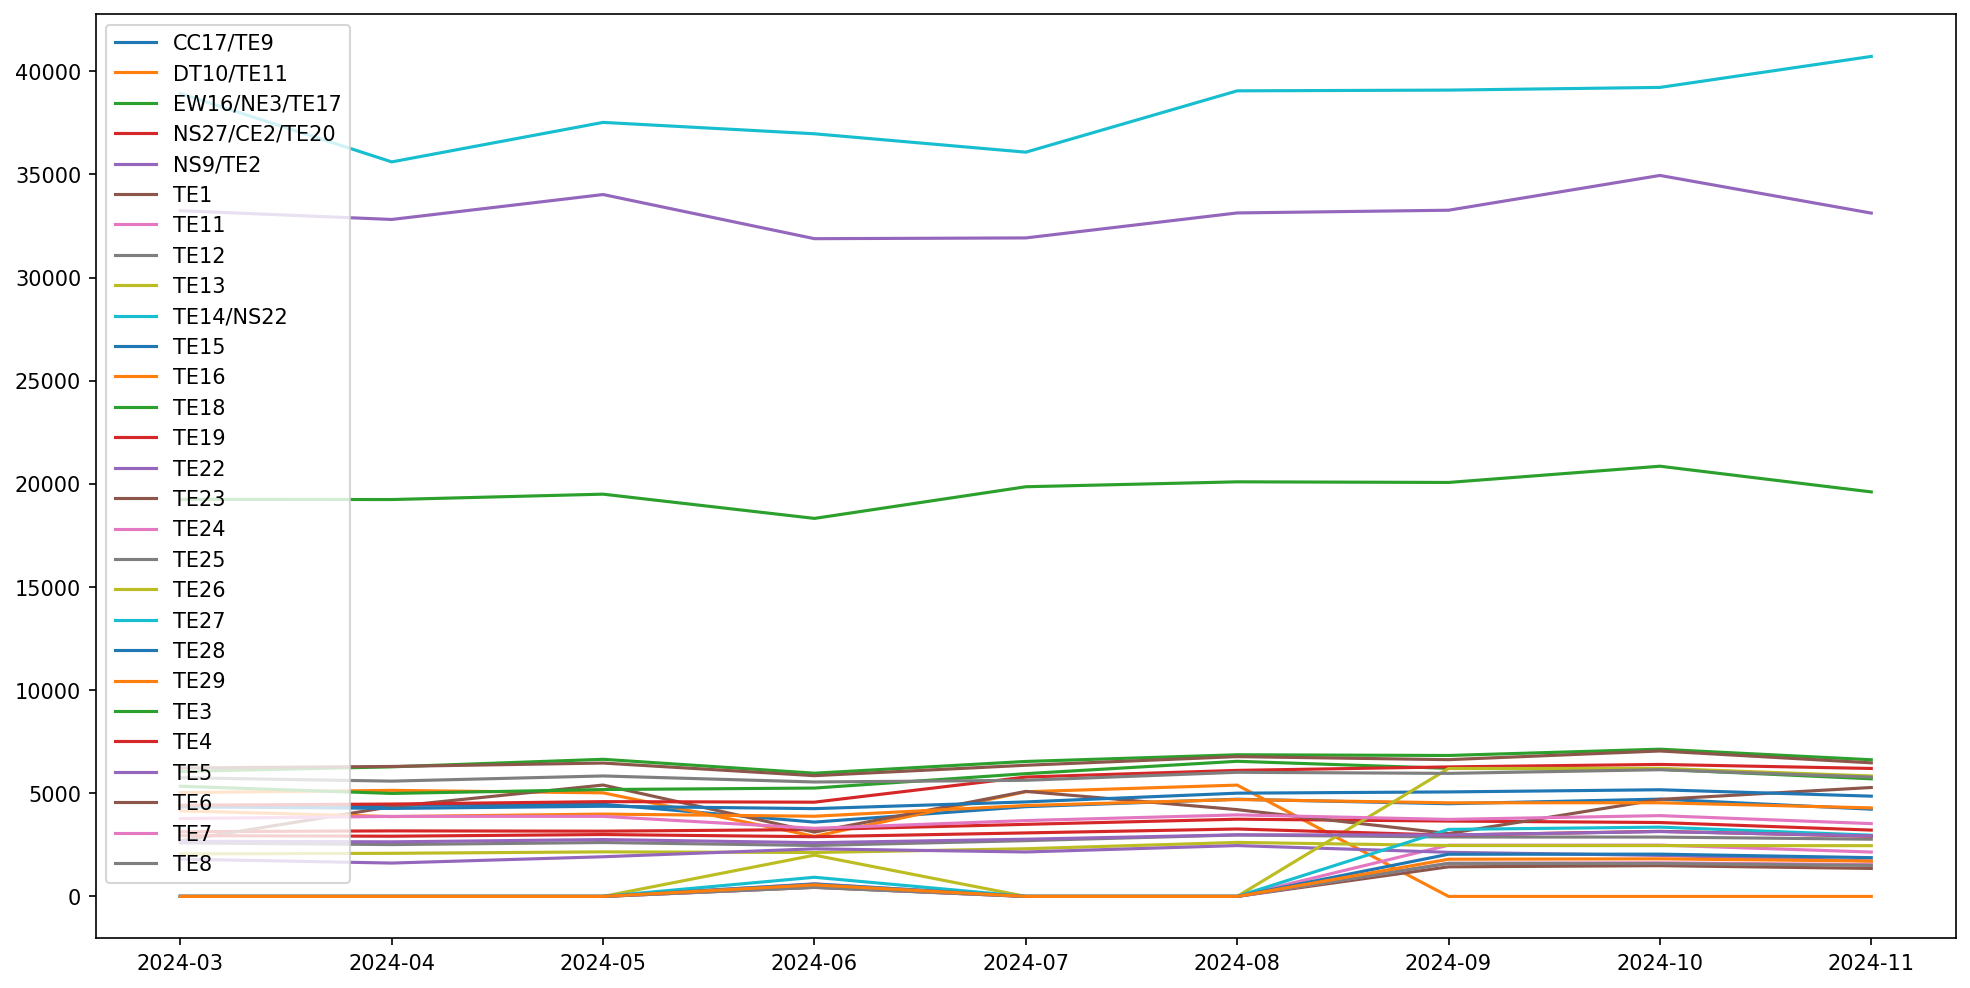

In [54]:
plt.figure(figsize=(16, 8), dpi=150) 

stations = mrt_thomson_ec_df['PT_CODE'].unique()
stations.sort()

for pt in stations:
    # temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY'].copy()
    temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['PT_CODE'] == pt].copy().sort_values(by='YEAR_MONTH')
    temp_df = temp_df.groupby('YEAR_MONTH')['TOTAL_TAP_IN_VOLUME'].mean()

    plt.plot(temp_df, label = pt)

plt.legend()
plt.xticks(np.arange(0, len(mrt_thomson_ec_df['YEAR_MONTH'].unique()), 1.0))
plt.show()

In [55]:
ridership_df_monthly = pd.read_csv('Data/Master Sets/monthly_ave_daily_pt_ridership.csv')

In [56]:
ridership_df_monthly[['month_str', 'year']] = ridership_df_monthly['month'].str.split('-', expand=True)

month_int = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

for i, row in ridership_df_monthly.iterrows():
    ridership_df_monthly.loc[i, 'month_int'] = month_int[row['month_str']]
    # row['month_int'] = month_int[row['month_str']]

In [57]:
ridership_df_monthly

,month,mode,ridership,month_str,year,month_int
0,Jan-19,MRT,3462000,Jan,19,1.0
1,Jan-19,LRT,218000,Jan,19,1.0
2,Jan-19,Public Bus,4250000,Jan,19,1.0
3,Feb-19,MRT,3248000,Feb,19,2.0
4,Feb-19,LRT,206000,Feb,19,2.0
...,...,...,...,...,...,...
175,Nov-23,LRT,200000,Nov,23,11.0
176,Nov-23,Public Bus,3738000,Nov,23,11.0
177,Dec-23,MRT,3070000,Dec,23,12.0
178,Dec-23,LRT,182000,Dec,23,12.0


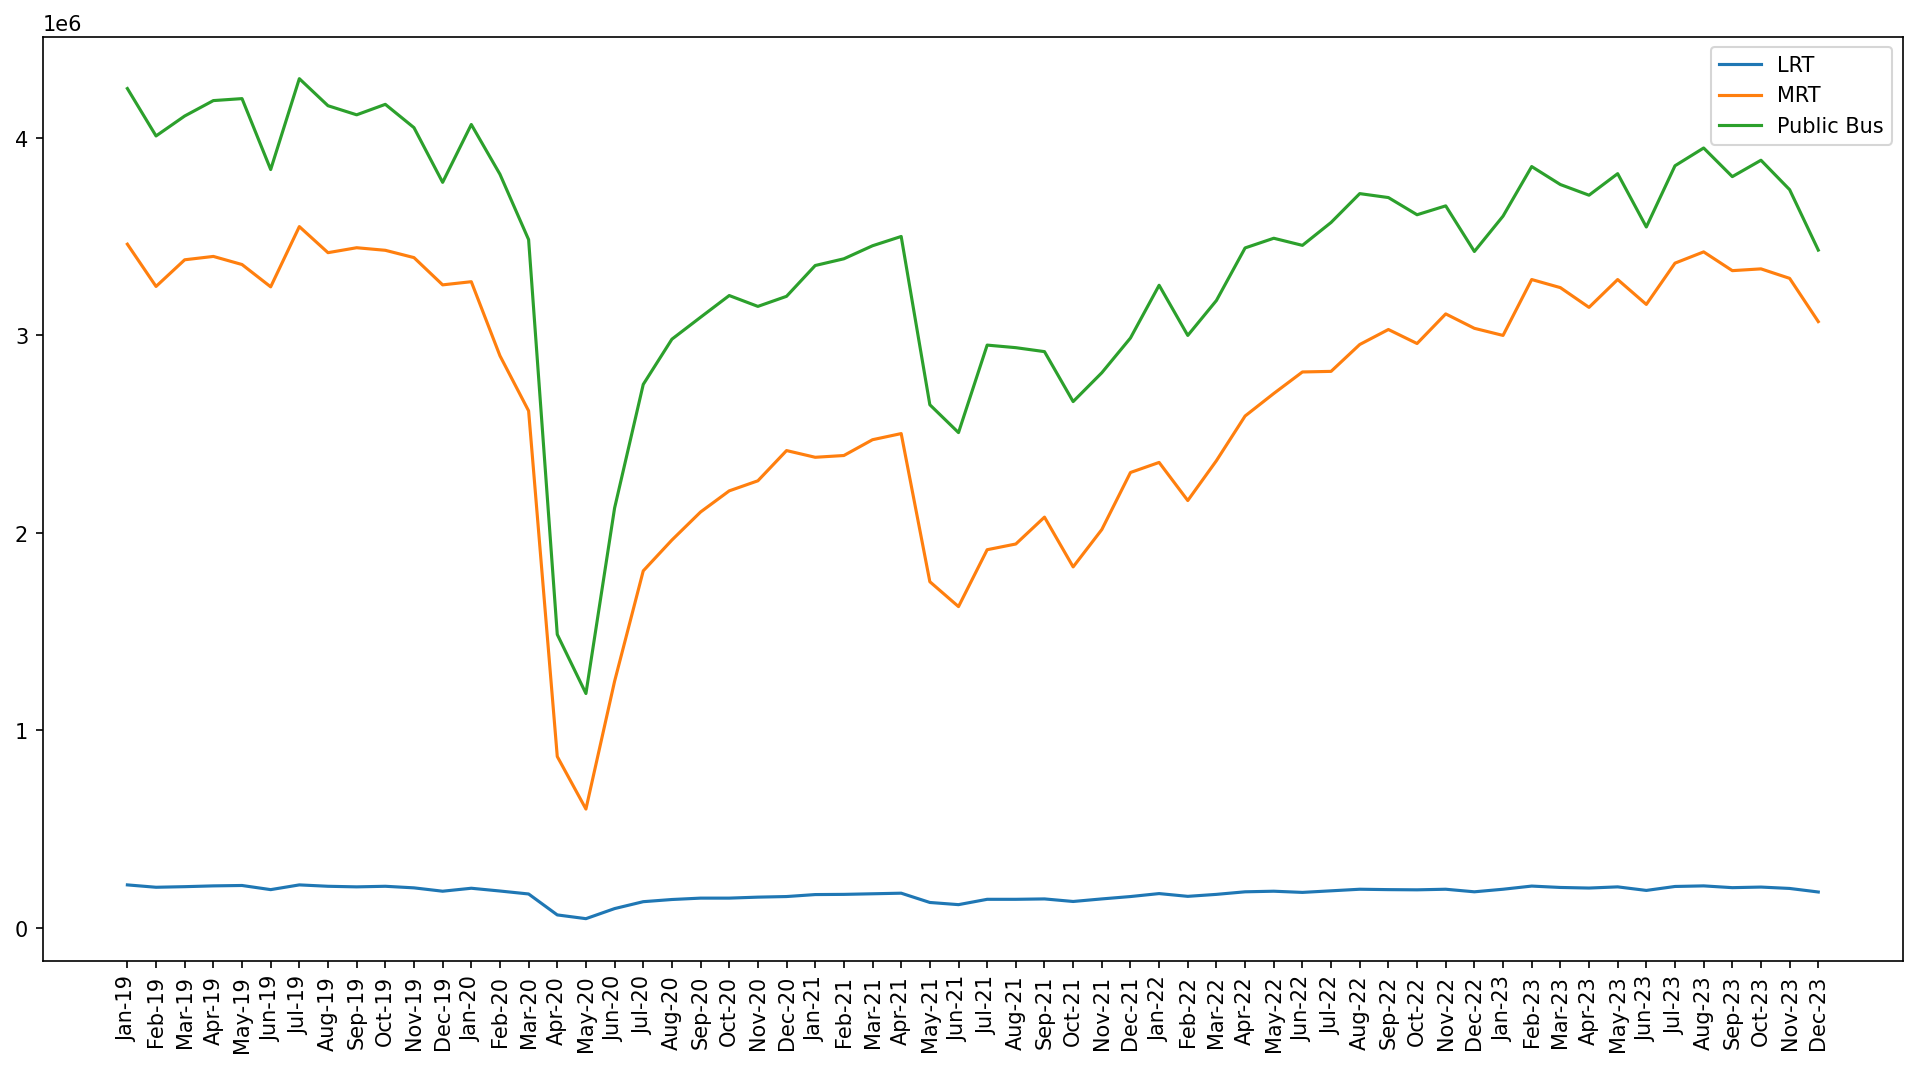

In [58]:
plt.figure(figsize=(16, 8), dpi=150) 

modes = ridership_df_monthly['mode'].unique()
modes.sort()

for mode in modes:
    # temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY'].copy()
    temp_df = ridership_df_monthly[ridership_df_monthly['mode'] == mode].copy().sort_values(by=['year' ,'month_int'])

    plt.plot(temp_df['month'], temp_df['ridership'], label = mode)

plt.legend()
plt.xticks(np.arange(0, len(ridership_df_monthly['month'].unique()), 1.0))
# tick_labels = plt.xticks()[0]
# for tick in tick_labels:
#     print(tick)
# for tick in plt.xticks():
#     print("1")
#     print(tick)
# plt.xticks(pad=15)

plt.xticks(rotation=90)
plt.show()

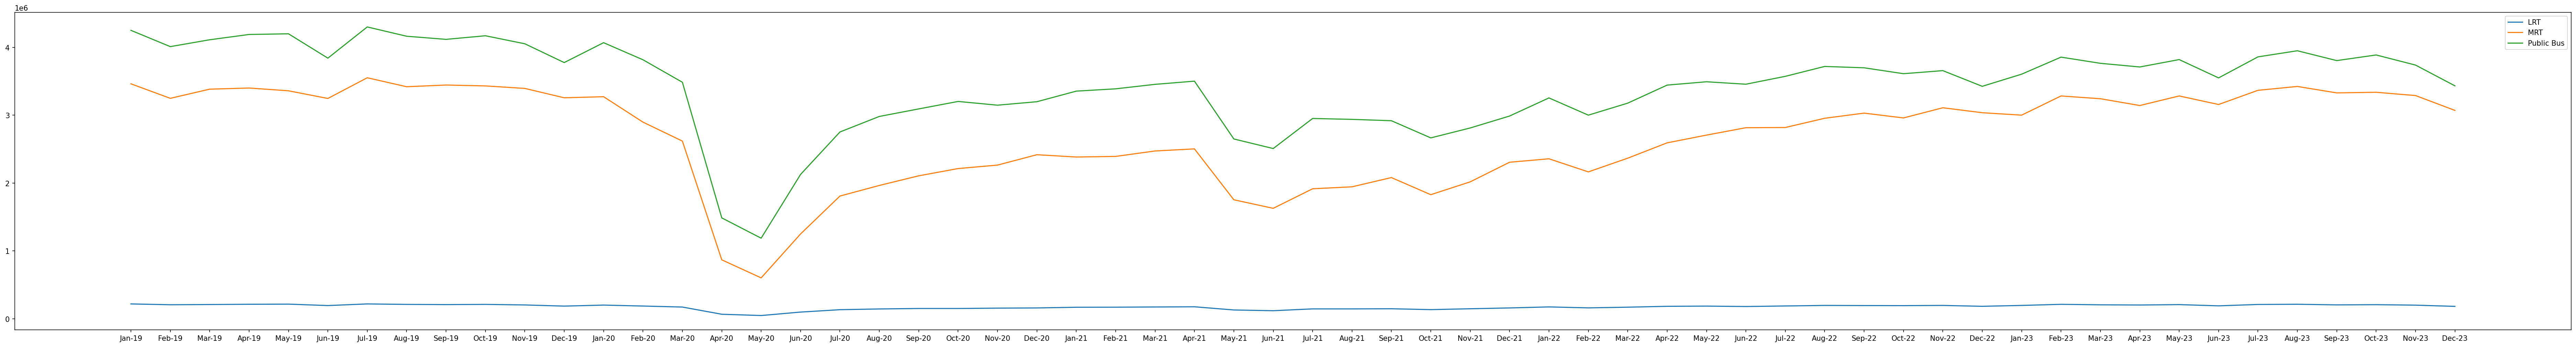

In [59]:
plt.figure(figsize=(64, 8), dpi=150) 

modes = ridership_df_monthly['mode'].unique()
modes.sort()

for mode in modes:
    # temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY'].copy()
    temp_df = ridership_df_monthly[ridership_df_monthly['mode'] == mode].copy().sort_values(by=['year' ,'month_int'])

    plt.plot(temp_df['month'], temp_df['ridership'], label = mode)

plt.legend()
plt.xticks(np.arange(0, len(ridership_df_monthly['month'].unique()), 1.0))
plt.show()

In [60]:
ridership_df_yearly = pd.read_csv('Data/Master Sets/yearly_ave_daily_pt_ridership.csv')

In [61]:
ridership_df_yearly

,year,mode,ridership
0,1995,MRT,740000
1,1995,LRT,0
2,1995,Public Bus,3009000
3,1996,MRT,850000
4,1996,LRT,0
...,...,...,...
82,2022,LRT,184000
83,2022,Public Bus,3461000
84,2023,MRT,3243000
85,2023,LRT,202000


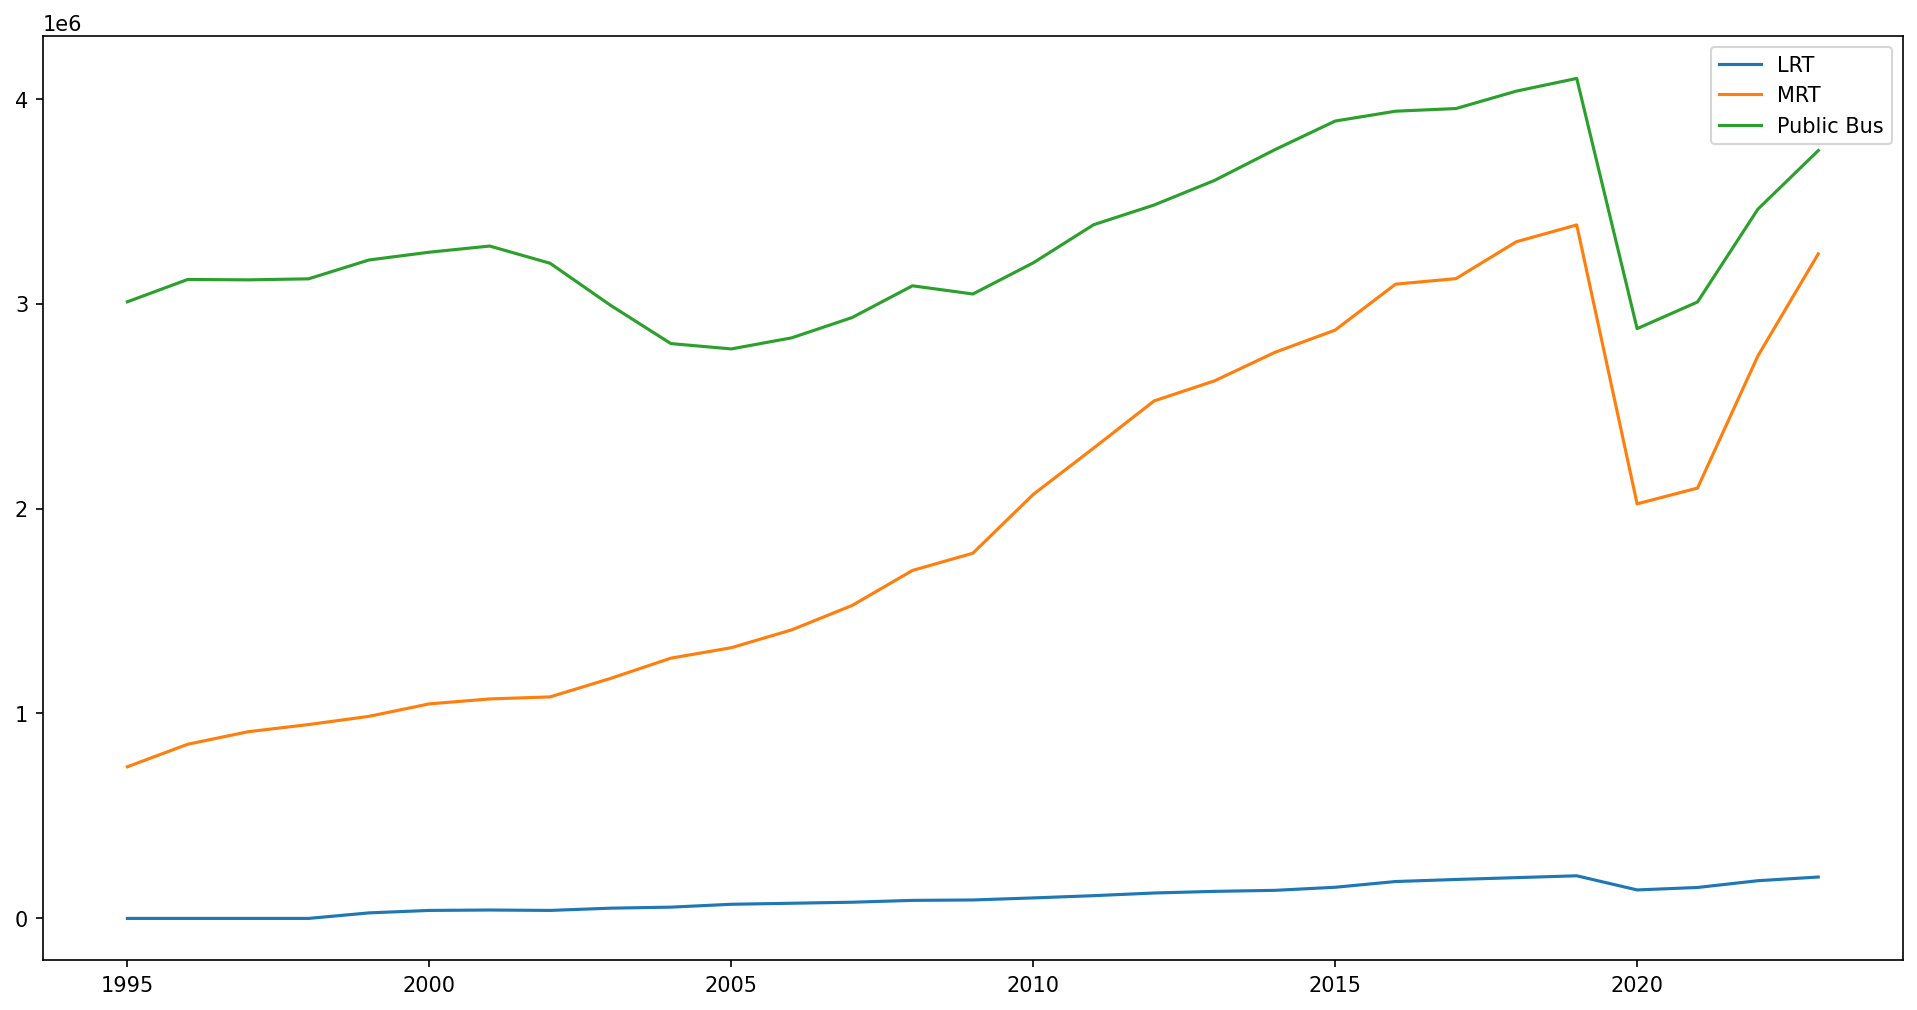

In [62]:
plt.figure(figsize=(16, 8), dpi=150) 

modes = ridership_df_yearly['mode'].unique()
modes.sort()

for mode in modes:
    # temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY'].copy()
    temp_df = ridership_df_yearly[ridership_df_yearly['mode'] == mode].copy().sort_values(by='year')

    plt.plot(temp_df['year'], temp_df['ridership'], label = mode)

plt.legend()
plt.show()